In [30]:
!pip install qiskit qiskit-aer pylatexenc -q

In [31]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, noise
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def inverse_qft(qc, n):
    for qubit in range(n // 2):
        qc.swap(qubit, n - qubit - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi / (2 ** (j - m)), m, j)
        qc.h(j)

def qpe_circuit(num_count_qubits, theta):
    qc = QuantumCircuit(num_count_qubits + 1, num_count_qubits)
    qc.h(range(num_count_qubits))
    qc.x(num_count_qubits)
    for qubit in range(num_count_qubits):
        qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)
    inverse_qft(qc, num_count_qubits)
    qc.measure(range(num_count_qubits), range(num_count_qubits))
    return qc

def run_qpe(num_count_qubits=3, theta=0.125, noisy=False):
    if noisy:
        error_1q = noise.depolarizing_error(0.01, 1)
        error_2q = noise.depolarizing_error(0.02, 2)
        noise_model = noise.NoiseModel()
        noise_model.add_all_qubit_quantum_error(error_1q, ['u1', 'u2', 'u3'])
        noise_model.add_all_qubit_quantum_error(error_2q, ['cx'])
        simulator = AerSimulator(noise_model=noise_model)
    else:
        simulator = AerSimulator()

    qc = qpe_circuit(num_count_qubits, theta)
    qc.save_statevector()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=2048).result()
    counts = result.get_counts()

    if not counts:
        print("⚠️ No measurement data returned — check classical register mapping.")
        return

    plot_histogram(counts)
    plt.title(f"QPE (θ={theta}, qubits={num_count_qubits}, noisy={noisy})")
    plt.show()

    expected = format(int(theta * (2 ** num_count_qubits)), f'0{num_count_qubits}b')
    print(qc.draw(output='text'))
    print(f"\nExpected binary phase: {expected}")
    print("Measured counts:", counts)


=== Running QPE for θ = 0.125 ===


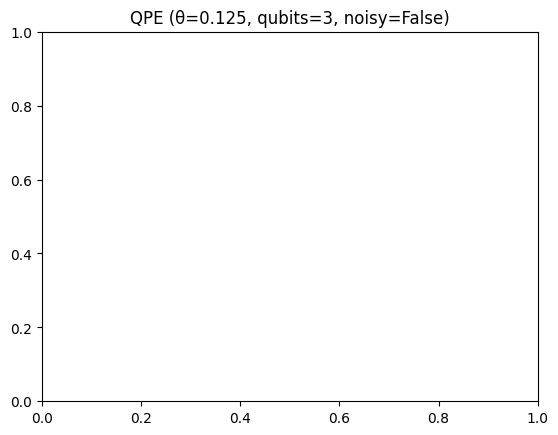

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐            statevector 
«q_0: ┤M├─────────────────░──────
«     └╥┘     ┌─┐         ░      
«q_1: ─╫──────┤M├─

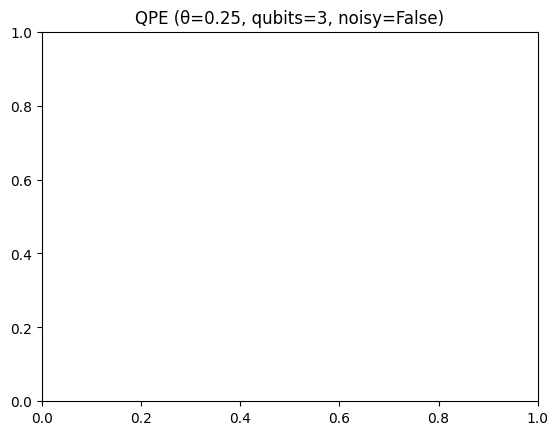

     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐            statevector 
«q_0: ┤M├─────────────────░──────
«     └╥┘     ┌─┐         ░      
«q_1: ─╫──────┤M├─────────░──

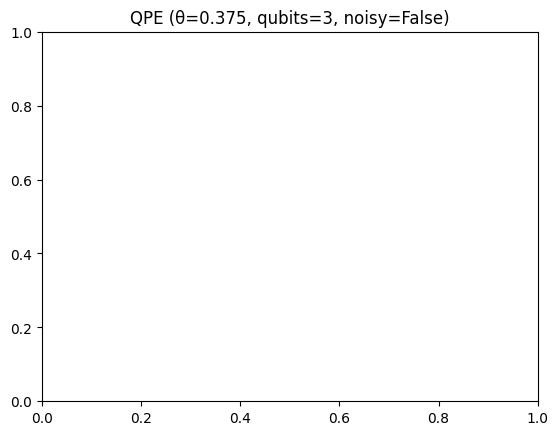

     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐            statevector 
«q_0: ──────────┤M├─────────────────░──────
«               └╥┘     ┌─┐         ░      
«q_1: ─■─────────╫──────┤M├─────────░──────
«      │P(-π/2)  ║ ┌─

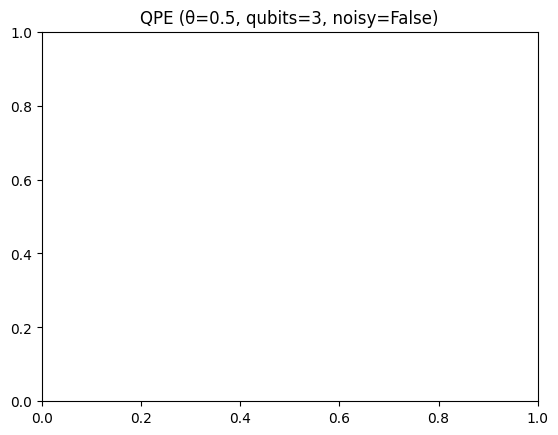

     ┌───┐                          ┌───┐                                   ┌─┐»
q_0: ┤ H ├─■──────────────────────X─┤ H ├─■──────────────■──────────────────┤M├»
     ├───┤ │                      │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘»
q_1: ┤ H ├─┼──────■───────────────┼───────■────────┤ H ├─┼─────────■─────────╫─»
     ├───┤ │      │               │                └───┘ │P(-π/4)  │P(-π/2)  ║ »
q_2: ┤ H ├─┼──────┼───────■───────X──────────────────────■─────────■─────────╫─»
     ├───┤ │P(π)  │P(2π)  │P(4π)                                             ║ »
q_3: ┤ X ├─■──────■───────■──────────────────────────────────────────────────╫─»
     └───┘                                                                   ║ »
c: 3/════════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                 statevector 
«q_0: ─────────────────░──────
«          ┌─┐         ░      
«q_1: ─────┤M├──

In [33]:
# TASK 1: Change the Phase Value

for theta in [0.125, 0.25, 0.375, 0.5]:
    print(f"\n=== Running QPE for θ = {theta} ===")
    run_qpe(num_count_qubits=3, theta=theta)



=== Running QPE for θ = 0.125 ===


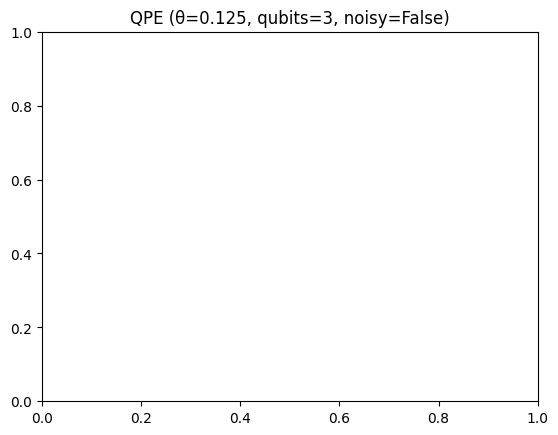

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐            statevector 
«q_0: ┤M├─────────────────░──────
«     └╥┘     ┌─┐         ░      
«q_1: ─╫──────┤M├─

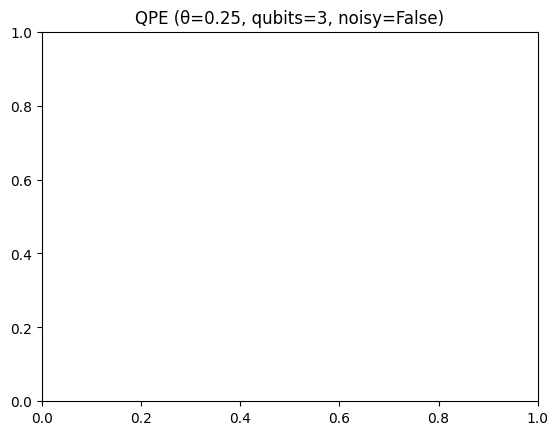

     ┌───┐                           ┌───┐                                   »
q_0: ┤ H ├─■───────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                       │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■──────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │              │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼──────■───────X──────────────────────■─────────■────────»
     ├───┤ │P(π/2)  │P(π)  │P(2π)                                            »
q_3: ┤ X ├─■────────■──────■─────────────────────────────────────────────────»
     └───┘                                                                   »
c: 3/════════════════════════════════════════════════════════════════════════»
                                                                             »
«     ┌─┐            statevector 
«q_0: ┤M├─────────────────░──────
«     └╥┘     ┌─┐         ░      
«q_1: ─╫──────┤M├─────────░──

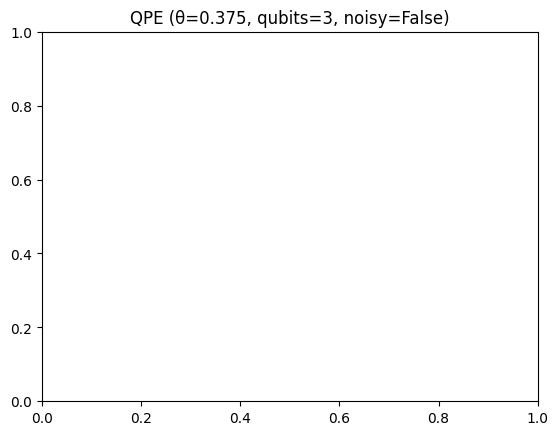

     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐            statevector 
«q_0: ──────────┤M├─────────────────░──────
«               └╥┘     ┌─┐         ░      
«q_1: ─■─────────╫──────┤M├─────────░──────
«      │P(-π/2)  ║ ┌─

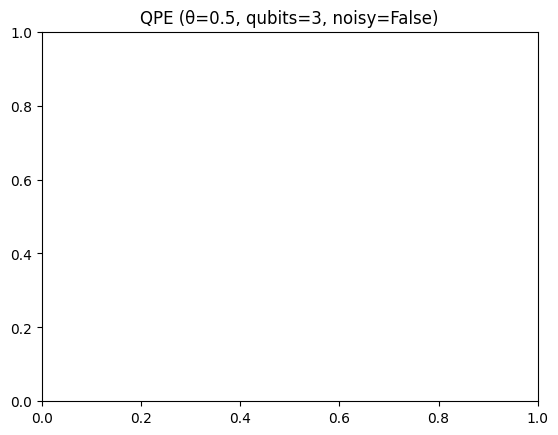

     ┌───┐                          ┌───┐                                   ┌─┐»
q_0: ┤ H ├─■──────────────────────X─┤ H ├─■──────────────■──────────────────┤M├»
     ├───┤ │                      │ └───┘ │P(-π/2) ┌───┐ │                  └╥┘»
q_1: ┤ H ├─┼──────■───────────────┼───────■────────┤ H ├─┼─────────■─────────╫─»
     ├───┤ │      │               │                └───┘ │P(-π/4)  │P(-π/2)  ║ »
q_2: ┤ H ├─┼──────┼───────■───────X──────────────────────■─────────■─────────╫─»
     ├───┤ │P(π)  │P(2π)  │P(4π)                                             ║ »
q_3: ┤ X ├─■──────■───────■──────────────────────────────────────────────────╫─»
     └───┘                                                                   ║ »
c: 3/════════════════════════════════════════════════════════════════════════╩═»
                                                                             0 »
«                 statevector 
«q_0: ─────────────────░──────
«          ┌─┐         ░      
«q_1: ─────┤M├──

In [34]:
# TASK 1: Change the Phase Value

for theta in [0.125, 0.25, 0.375, 0.5]:
    print(f"\n=== Running QPE for θ = {theta} ===")
    run_qpe(num_count_qubits=3, theta=theta)



=== Running QPE with 4 Counting Qubits ===


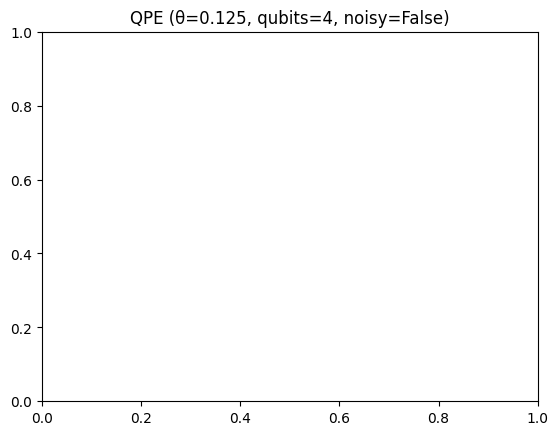

     ┌───┐                                    ┌───┐                         »
q_0: ┤ H ├─■────────────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                                │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼────────■─────────────────X─────┼───────■────────┤ H ├─┼────────»
     ├───┤ │        │                 │     │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼────────┼────────■────────X─────┼──────────────────────■────────»
     ├───┤ │        │        │              │                               »
q_3: ┤ H ├─┼────────┼────────┼──────■───────X───────────────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)                                  »
q_4: ┤ X ├─■────────■────────■──────■───────────────────────────────────────»
     └───┘                                                                  »
c: 4/═══════════════════════════════════════════════════════════════════════»
                                                                

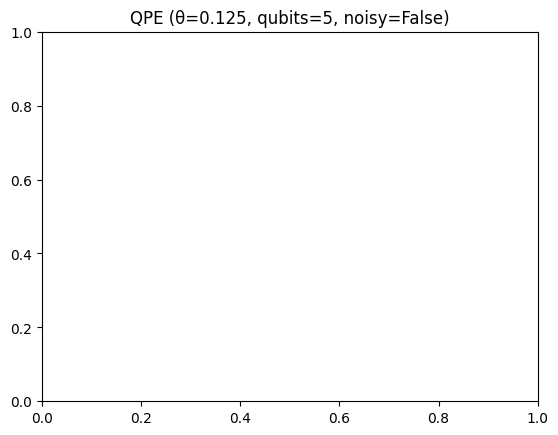

     ┌───┐                                            ┌───┐               »
q_0: ┤ H ├─■────────────────────────────────────────X─┤ H ├─■─────────────»
     ├───┤ │                                        │ └───┘ │P(-π/2) ┌───┐»
q_1: ┤ H ├─┼────────■─────────────────────────X─────┼───────■────────┤ H ├»
     ├───┤ │        │                         │     │                └───┘»
q_2: ┤ H ├─┼────────┼────────■────────────────┼─────┼─────────────────────»
     ├───┤ │        │        │                │     │                     »
q_3: ┤ H ├─┼────────┼────────┼──────■─────────X─────┼─────────────────────»
     ├───┤ │        │        │      │               │                     »
q_4: ┤ H ├─┼────────┼────────┼──────┼───────■───────X─────────────────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)  │P(2π)  │P(4π)                        »
q_5: ┤ X ├─■────────■────────■──────■───────■─────────────────────────────»
     └───┘                                                                »
c: 5/═══════

In [35]:
# TASK 2: Increase the Number of Counting Qubits

print("\n=== Running QPE with 4 Counting Qubits ===")
run_qpe(num_count_qubits=4, theta=0.125)

print("\n=== Running QPE with 5 Counting Qubits ===")
run_qpe(num_count_qubits=5, theta=0.125)


Comparing theoretical vs measured for θ = 0.375


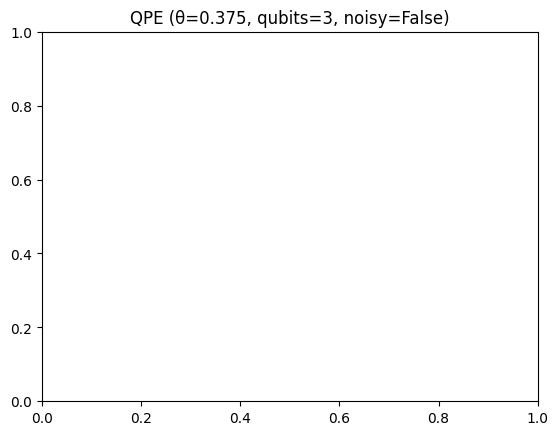

     ┌───┐                               ┌───┐                         »
q_0: ┤ H ├─■───────────────────────────X─┤ H ├─■──────────────■────────»
     ├───┤ │                           │ └───┘ │P(-π/2) ┌───┐ │        »
q_1: ┤ H ├─┼─────────■─────────────────┼───────■────────┤ H ├─┼────────»
     ├───┤ │         │                 │                └───┘ │P(-π/4) »
q_2: ┤ H ├─┼─────────┼─────────■───────X──────────────────────■────────»
     ├───┤ │P(3π/4)  │P(3π/2)  │P(3π)                                  »
q_3: ┤ X ├─■─────────■─────────■───────────────────────────────────────»
     └───┘                                                             »
c: 3/══════════════════════════════════════════════════════════════════»
                                                                       »
«               ┌─┐            statevector 
«q_0: ──────────┤M├─────────────────░──────
«               └╥┘     ┌─┐         ░      
«q_1: ─■─────────╫──────┤M├─────────░──────
«      │P(-π/2)  ║ ┌─

In [36]:
# TASK 3: Compare with Theoretical Output

theta = 0.375
print(f"Comparing theoretical vs measured for θ = {theta}")
run_qpe(num_count_qubits=3, theta=theta)


In [39]:
# TASK 4: Inverse QFT Visualization

# Ensure required dependency for 'mpl' circuit drawing
try:
    import pylatexenc  # noqa: F401
except ImportError:
    !pip install -q pylatexenc

from qiskit import QuantumCircuit
import numpy as np

num_count_qubits = 3
theta = 0.125

qc = QuantumCircuit(num_count_qubits + 1)
qc.h(range(num_count_qubits))
qc.x(num_count_qubits)

for qubit in range(num_count_qubits):
    qc.cp(2 * np.pi * theta * (2 ** qubit), qubit, num_count_qubits)

print("Circuit before inverse QFT:")

# Try graphical visualization first, fall back to text if needed
try:
    qc.draw('mpl')
except Exception:
    print(" Matplotlib drawer unavailable — showing text version instead.")
    print(qc.draw(output='text'))


Circuit before inverse QFT:
 Matplotlib drawer unavailable — showing text version instead.
     ┌───┐                         
q_0: ┤ H ├─■───────────────────────
     ├───┤ │                       
q_1: ┤ H ├─┼────────■──────────────
     ├───┤ │        │              
q_2: ┤ H ├─┼────────┼────────■─────
     ├───┤ │P(π/4)  │P(π/2)  │P(π) 
q_3: ┤ X ├─■────────■────────■─────
     └───┘                         



=== Running QPE with Noise Simulation ===


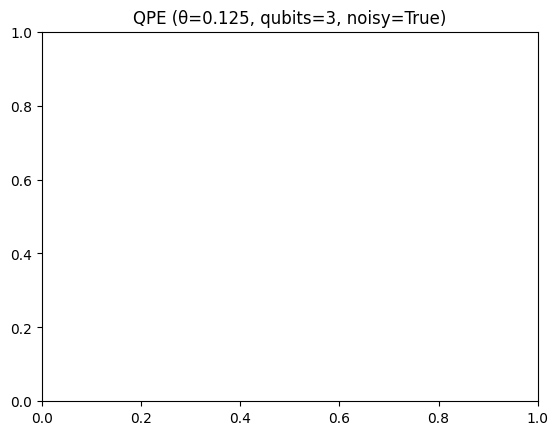

     ┌───┐                            ┌───┐                                   »
q_0: ┤ H ├─■────────────────────────X─┤ H ├─■──────────────■──────────────────»
     ├───┤ │                        │ └───┘ │P(-π/2) ┌───┐ │                  »
q_1: ┤ H ├─┼────────■───────────────┼───────■────────┤ H ├─┼─────────■────────»
     ├───┤ │        │               │                └───┘ │P(-π/4)  │P(-π/2) »
q_2: ┤ H ├─┼────────┼────────■──────X──────────────────────■─────────■────────»
     ├───┤ │P(π/4)  │P(π/2)  │P(π)                                            »
q_3: ┤ X ├─■────────■────────■────────────────────────────────────────────────»
     └───┘                                                                    »
c: 3/═════════════════════════════════════════════════════════════════════════»
                                                                              »
«     ┌─┐            statevector 
«q_0: ┤M├─────────────────░──────
«     └╥┘     ┌─┐         ░      
«q_1: ─╫──────┤M├─

In [40]:
# TASK 5: Noise Simulation

print("\n=== Running QPE with Noise Simulation ===")
run_qpe(num_count_qubits=3, theta=0.125, noisy=True)
